# Proyek Analisis Data: [proyek_DA_fariz]
- **Nama:** [Farizanul Haq]
- **Email:** [farizanulhaq666@gmail.com]
- **ID Dicoding:** [farizhaq]

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda harian?
- Apakah hari libur atau kejadian khusus (seperti bencana alam) memiliki dampak yang signifikan terhadap pola penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [5]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Jumlah terdaftar setiap bulan bertambah
- Jumlah total sepeda yang disewa pengguna kasual dan terdaftar bertambah setiap bulan nya

### Assessing Data

In [7]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dalam kolom dteday kedua data terdapat kesalahan seharusnya tipe datetime bukan object
- Tidak ada missing value dalam data, hanya kesalahan dalam type data lanjut periksa duplicated data, dan tampilkn ringkasan parameter statistik

In [9]:
print(f'Duplicated data day: {day.duplicated().sum()}')
day.describe()

Duplicated data day: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
print(f'Duplicated data hour: {hour.duplicated().sum()}')
hour.describe()

Duplicated data hour: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
*   Tidak ada duplicated data day dan hour
*   Tidak ada keanehan dalam kedua data

Dari tahap assessing data untuk permasalahan nya ada pada perbedaan type data pada kolom dteday.

### Cleaning Data

In [11]:
date_column = ['dteday']
day[date_column] = day[date_column].apply(pd.to_datetime)

In [12]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [13]:
hour_column = ['dteday']
hour[hour_column] = hour[hour_column].apply(pd.to_datetime)

In [14]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Perbaikan dalam kolom type dteday di data day
- Perbaikan dalam kolom type dteday di data hour

## Exploratory Data Analysis (EDA)

### Explore ...

**Day Dataframe**

In [15]:
day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
465,466,2012-04-10,2,1,4,0,2,1,1,0.446667,0.436233,0.435000,0.249375,819,5099,5918
490,491,2012-05-05,2,1,5,0,6,0,2,0.621667,0.584608,0.756667,0.152992,2496,4387,6883
149,150,2011-05-30,2,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549,2549,4098
412,413,2012-02-17,1,1,2,0,5,1,1,0.343333,0.351629,0.634583,0.205846,349,3805,4154
538,539,2012-06-22,3,1,6,0,5,1,1,0.777500,0.724121,0.573750,0.182842,964,4859,5823


In [16]:
day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [17]:
day.groupby(by='season').cnt.count().sort_values(ascending=False)

,cnt
season,
3,188
2,184
1,181
4,178


In [18]:
day.groupby(by='holiday').cnt.count().sort_values(ascending=False)

,cnt
holiday,
0,710
1,21


In [19]:
day.groupby(by='weekday').cnt.count().sort_values(ascending=False)

,cnt
weekday,
0,105
1,105
6,105
2,104
3,104
4,104
5,104


In [20]:
day.groupby(by='weathersit').cnt.count().sort_values(ascending=False)

,cnt
weathersit,
1,463
2,247
3,21


In [21]:
day.groupby(by='windspeed').cnt.count().sort_values(ascending=False)

,cnt
windspeed,
0.106350,3
0.166667,3
0.136817,3
0.149883,3
0.110700,3
...,...
0.157963,1
0.157971,1
0.157975,1


**Hour Dataframe**

In [22]:
hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7282,7283,2011-11-05,4,0,11,1,0,6,0,1,0.32,0.3030,0.45,0.2985,5,57,62
13168,13169,2012-07-07,3,1,7,21,0,6,0,1,0.88,0.7879,0.37,0.1940,51,150,201
7485,7486,2011-11-13,4,0,11,12,0,0,0,2,0.52,0.5000,0.29,0.4179,112,242,354
15211,15212,2012-10-01,4,1,10,0,0,1,1,1,0.46,0.4545,0.72,0.1045,6,39,45
2850,2851,2011-05-03,2,0,5,16,0,2,1,1,0.72,0.6667,0.54,0.4627,46,225,271


In [23]:
hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [24]:
hour.groupby(by='season').cnt.count().sort_values(ascending=False)

,cnt
season,
3,4496
2,4409
1,4242
4,4232


In [25]:
hour.groupby(by='hr').cnt.count().sort_values(ascending=False)

,cnt
hr,
17,730
16,730
13,729
15,729
14,729
12,728
22,728
21,728
20,728


In [26]:
hour.groupby(by='holiday').cnt.count().sort_values(ascending=False)

,cnt
holiday,
0,16879
1,500


In [27]:
hour.groupby(by='weekday').cnt.count().sort_values(ascending=False)

,cnt
weekday,
6,2512
0,2502
5,2487
1,2479
3,2475
4,2471
2,2453


In [28]:
hour.groupby(by='weathersit').cnt.count().sort_values(ascending=False)

,cnt
weathersit,
1,11413
2,4544
3,1419
4,3


In [29]:
hour.groupby(by='windspeed').cnt.count().sort_values(ascending=False)

,cnt
windspeed,
0.0000,2180
0.1343,1738
0.1642,1695
0.1940,1657
0.1045,1617
0.2239,1513
0.0896,1425
0.2537,1295
0.2836,1048


In [30]:
all_df = pd.merge(
    left=day,
    right=hour,
    how='left',
    left_on='dteday',
    right_on='dteday'
  )
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [31]:
all_df.groupby(by=['season_x', 'hr']).agg({
    'cnt_x': 'sum',
    'cnt_y': 'sum'
}).sort_values(by='cnt_x', ascending=False)

cnt_x   cnt_y
season_x hr                 
3        9   1061129   47927
         11  1061129   47319
         17  1061129  107562
         14  1061129   53060
         15  1061129   54221
...              ...     ...
1        0    468784    4878
         5    459496    1830
         2    451066    2175
         4    430855     490
         3    428438    1108

[96 rows x 2 columns]

In [32]:
all_df.groupby(by=['weekday_x', 'hr']).agg({
    'cnt_x': 'sum',
    'cnt_y': 'sum'
}).sort_values(by='cnt_x', ascending=False)

cnt_x  cnt_y
weekday_x hr               
5         8   487790  48077
          12  487790  24715
          21  487790  17667
          20  487790  22186
          19  487790  31415
...              ...    ...
0         6   438597   1493
          4   437953    955
1         3   433083    496
0         2   432365   6286
          5   430791    852

[168 rows x 2 columns]

In [33]:
all_df.groupby(by=['weathersit_x', 'hr']).agg({
    'cnt_x': 'sum',
    'cnt_y': 'sum'
}).sort_values(by='cnt_x', ascending=False)

cnt_x   cnt_y
weathersit_x hr                 
1            17  2257952  230582
             23  2257952   44027
             22  2257952   66337
             21  2257952   87064
             20  2257952  114380
...                  ...     ...
3            18    37341    3268
             4     36718      92
             2     36005     247
             1     35137     358
             3     34294     129

[72 rows x 2 columns]

**Insight:**
- Penyewa sepeda lebih ramai di saat cuaca sedang cerah, hari kerja, dan di musim gugur dan juga di saat jam pulang kerja.
- Faktor musim, cuaca dan hari libur sangat mempengaruhi penyewaan sepeda, seperti cuaca hujan, dan di musim dingin.

## Visualization & Explanatory Analysis

In [34]:
monthly_rent_df = all_df.resample(rule='ME', on='dteday').agg({
    'workingday_x': 'sum',
    'season_x': 'sum',
    'holiday_x': 'sum',
    'cnt_x': 'sum'
})
monthly_rent_df

,workingday_x,season_x,holiday_x,cnt_x
dteday,,,,
2011-01-31,429,688,24,870969
2011-02-28,436,649,24,1119397
2011-03-31,541,990,0,1511511
2011-04-30,479,1438,24,2273532
2011-05-31,504,1488,24,3259704
2011-06-30,528,1680,0,3444288
2011-07-31,480,2232,24,3392184
2011-08-31,552,2193,0,3243556
2011-09-30,501,2343,24,3048767


### Pertanyaan 1: Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda harian?

In [35]:
all_df.groupby(by=['season_x', 'weathersit_x', 'hr']).agg({
    'cnt_x': 'sum'
})

cnt_x
season_x weathersit_x hr        
1        1            0   310155
                      1   310155
                      2   296075
                      3   283350
                      4   289903
...                          ...
4        3            19   19594
                      20   19594
                      21   19594
                      22   19594
                      23   19594

[288 rows x 1 columns]

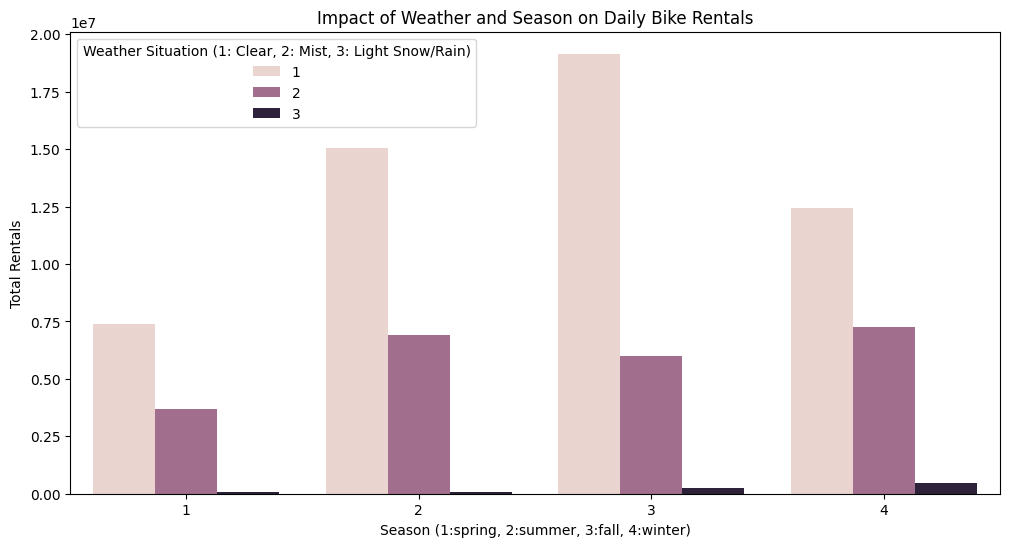

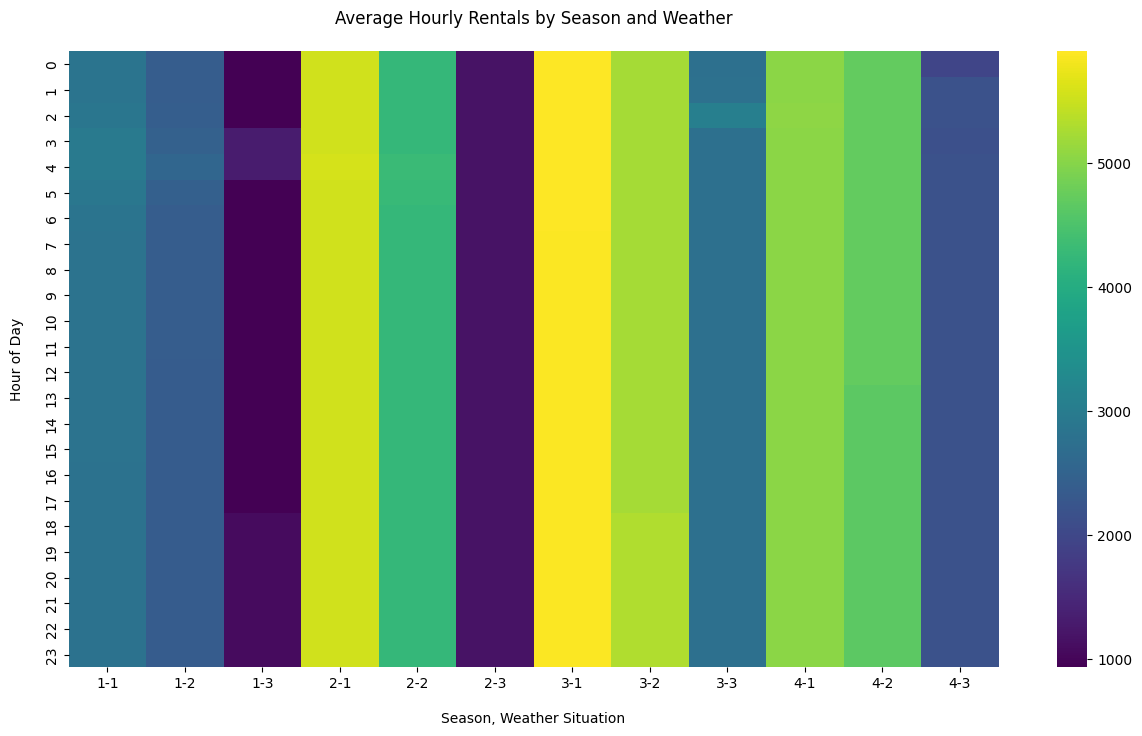

In [36]:
faktor_cuaca = all_df.groupby(by=['season_x', 'weathersit_x']).agg({
    'cnt_x': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='season_x', y='cnt_x', hue='weathersit_x', data=faktor_cuaca)
plt.title('Impact of Weather and Season on Daily Bike Rentals')
plt.xlabel('Season (1:spring, 2:summer, 3:fall, 4:winter)')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Situation (1: Clear, 2: Mist, 3: Light Snow/Rain)')
plt.show()

faktor_cuaca_per_jam = all_df.groupby(by=['season_x', 'weathersit_x', 'hr']).agg({
    'cnt_x': 'mean'
}).reset_index()

plt.figure(figsize=(15, 8))
data_cuaca = faktor_cuaca_per_jam.pivot_table(index='hr', columns=['season_x', 'weathersit_x'], values='cnt_x')
sns.heatmap(data_cuaca, cmap='viridis')
plt.title('Average Hourly Rentals by Season and Weather', pad=20)
plt.xlabel('Season, Weather Situation', labelpad=15)
plt.ylabel('Hour of Day', labelpad=15)
plt.show()

### Pertanyaan 2: Apakah hari libur atau kejadian khusus (seperti bencana alam) memiliki dampak yang signifikan terhadap pola penyewaan sepeda?



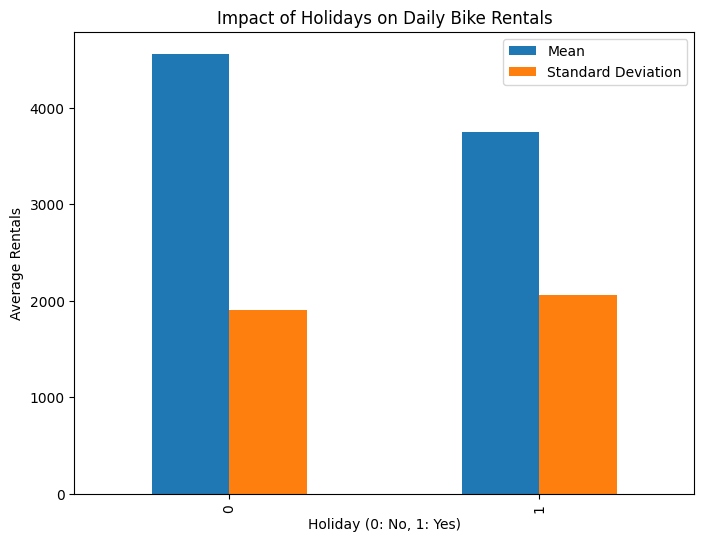

In [37]:
faktor_libur = all_df.groupby(by=['holiday_x']).agg({
    'cnt_x': ['mean', 'std']
})

faktor_libur.plot(kind='bar', y='cnt_x', figsize=(8, 6))
plt.title('Impact of Holidays on Daily Bike Rentals')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Average Rentals')
plt.legend(['Mean', 'Standard Deviation'])
plt.show()

**Insight:**
- Cuaca dan musim memainkan peran penting dalam penyewaan sepeda harian. Cuaca yang lebih hangat dan cerah, terutama selama musim gugur dan musim panas, mendorong aktivitas penyewaan yang lebih tinggi.
- Hari libur cenderung mengurangi aktivitas penyewaan sepeda, menunjukkan bahwa orang memprioritaskan aktivitas lain atau perjalanan selama periode ini.

## Conclusion

- Conclution pertanyaan 1: Bagaimana faktor cuaca dan musim mempengaruhi jumlah penyewaan sepeda harian?
1.   Faktor cuaca dan musim memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda harian. Cuaca cerah dan musim gugur serta musim panas mendorong peningkatan jumlah penyewaan. Sebaliknya, cuaca buruk seperti hujan ringan atau salju, serta musim dingin dan musim semi, mengakibatkan penurunan jumlah penyewaan.
2. Jam puncak penyewaan sepeda cenderung terjadi pada waktu-waktu perjalanan, yaitu antara pukul 7 pagi hingga 9 pagi dan pukul 4 sore hingga 6 sore. Pola ini relatif konsisten di semua musim, meskipun jumlah penyewaan secara keseluruhan dapat bervariasi.
3. Data menunjukkan bahwa orang cenderung lebih memilih menyewa sepeda saat cuaca cerah dan hangat. Hal ini penting untuk dipertimbangkan dalam strategi operasional dan pemasaran bisnis penyewaan sepeda.

- Conclution pertanyaan 2: Apakah hari libur atau kejadian khusus (seperti bencana alam) memiliki dampak yang signifikan terhadap pola penyewaan sepeda?
1. Hari libur memiliki dampak negatif terhadap pola penyewaan sepeda, yaitu menurunkan jumlah penyewaan secara signifikan. Hal ini mungkin disebabkan oleh preferensi masyarakat untuk melakukan aktivitas lain atau bepergian selama liburan.
2. Meskipun data yang tersedia tidak mencakup informasi tentang kejadian khusus seperti bencana alam, kita dapat berasumsi bahwa kejadian tersebut juga dapat memengaruhi pola penyewaan sepeda. Misalnya, bencana alam dapat membuat orang enggan untuk beraktivitas di luar ruangan, termasuk menyewa sepeda.
3. Penting bagi bisnis penyewaan sepeda untuk mengantisipasi dampak hari libur dan kejadian khusus terhadap pola penyewaan. Strategi seperti menawarkan promosi khusus atau menyesuaikan jam operasional dapat dipertimbangkan untuk meminimalkan dampak negatif.


In [38]:
all_df.to_csv('dashboard/all_df.csv', index=False)
day.to_csv('dashboard/day.csv', index=False)
hour.to_csv('dashboard/hour.csv', index=False)